# **Pratical 1**

In [3]:
import numpy as np

In [4]:
#creating the sparse matrix.
import csv
with open('ratings.csv', 'r') as file:
    reader = csv.reader(file) #taking the file
    #creating the relations between the indexes and the movies and the users.
    map_user_to_idx = {}
    map_idx_to_user = []
    map_movie_to_idx = {}
    map_idx_to_movie = []
    #lists for all the data
    data_by_user = []
    data_by_movie = []
    
    #lists for the train
    data_by_user_train = []
    data_by_movie_train = []
    
    #lists for the test. 
    data_by_user_test = []
    data_by_movie_test = []

    #taking each row of the csv one by one.
    for row in reader:
      user = row[0] #stocking the user
      movie = row[1] #stocking the movie
      rating = row[2] #stocking the rating

      if user =='userId':
        continue
      
      #creating the list for the new user
      if user not in map_user_to_idx:
        map_user_to_idx[user] = len(map_user_to_idx)
        map_idx_to_user.append(user)
        data_by_user_train.append([])
        data_by_user_test.append([])
        data_by_user.append([])

      #creating the list for the new movie
      if movie not in map_movie_to_idx:
        map_movie_to_idx[movie]=len(map_movie_to_idx)
        map_idx_to_movie.append(movie)
        data_by_movie_train.append([])
        data_by_movie_test.append([])
        data_by_movie.append([])
      data_by_user[map_user_to_idx[user]].append((map_movie_to_idx[movie], float(rating)))
      data_by_movie[map_movie_to_idx[movie]].append((map_user_to_idx[user], float(rating)))
      # flip a coin
      if np.random.rand() < 0.05:
        data_by_user_test[map_user_to_idx[user]].append((map_movie_to_idx[movie],float(rating)))
        data_by_movie_test[map_movie_to_idx[movie]].append((map_user_to_idx[user],float(rating)))
      else:
        data_by_user_train[map_user_to_idx[user]].append((map_movie_to_idx[movie],float(rating)))
        data_by_movie_train[map_movie_to_idx[movie]].append((map_user_to_idx[user],float(rating)))


print(f'len data: {len(data_by_user[0])}')
print(f'len train : {len(data_by_user_train[0])}')
print(f'len test : {len(data_by_user_test[0])}')


len data: 232
len train : 218
len test : 14


In [3]:
#creating a dictionary mapping the frequency of each degree of movie
dico={}
for i in range(len(data_by_movie)):
  if len(data_by_movie[i]) not in dico:
    dico[len(data_by_movie[i])]=1
  else:
    dico[len(data_by_movie[i])]+=1


In [4]:
#creating a dictionary mapping the frequency of each degree of user.
dico1={}
for i in range(len(data_by_user)):
  if len(data_by_user[i]) not in dico1:
    dico1[len(data_by_user[i])]=1
  else:
    dico1[len(data_by_user[i])]+=1

In [8]:
import matplotlib.pyplot as plt
#function plotting the degree.
def plot_degree(dico, dico1,title="Degree with frequency"):

  fig, ax = plt.subplots(figsize=(6,6))

  #Annotate x-axis
  #ax.set_xlim(xmin, xmax)
  ax.set_xscale('log')
  ax.set_xlabel('degree')
 

  # Annotate y-axis
  #ax.set_ylim(ymin, ymax)
  ax.set_yscale('log')
  ax.set_ylabel('frequency')


  #scatter for the degree of users and movies.
  ax.scatter(list(dico.keys()),list(dico.values()),marker='o', s=10, c='b', label='movies')
  ax.scatter(list(dico1.keys()),list(dico1.values()),marker='o', s=10, c='g',  label='users')
  # Legend and plot:
  ax.legend( bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
  ax.set_title(title, pad=20)
  plt.savefig('scale_power.pdf', format = 'pdf', bbox_inches = 'tight')
  plt.legend()
  plt.show()

In [9]:
#creating a dictionary mapping the frequency of each ratings.
diction={}
for i in range(len(data_by_movie)):
  for j in range(len(data_by_movie[i])):
    if float(data_by_movie[i][j][1]) not in diction:
      diction[float(data_by_movie[i][j][1])]=1
    else:
      diction[float(data_by_movie[i][j][1])]+=1

In [ ]:
#lists corresponding the ratings and each frequency
print(diction.keys())
print(diction.values())

dict_keys([4.0, 5.0, 4.5, 2.0, 3.0, 3.5, 2.5, 1.0, 0.5, 1.5])
dict_values([8367654, 4596577, 2974000, 2028622, 6054990, 4290105, 1685386, 946675, 525132, 531063])


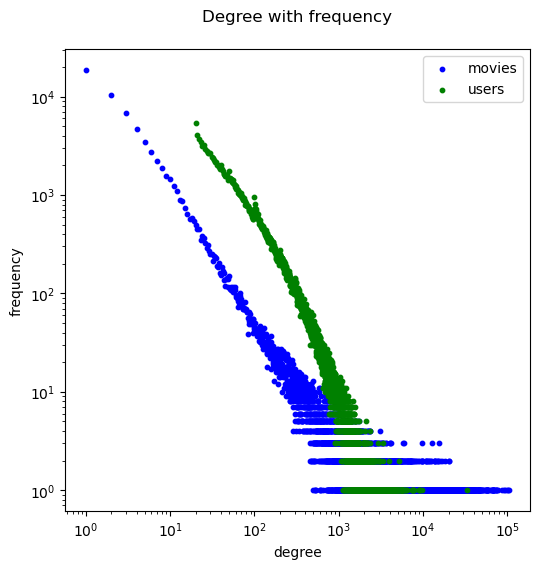

In [10]:
plot_degree(dico,dico1)

In [15]:
#function plotting the ratings frequencies
def plot_ratings(diction, title="Ratings frequency"):
  #sorting the list of ratings.
  liste=list(diction.keys())
  liste.sort()
  
  #adapting the dictionary with the sorting list.
  diction={k: diction[k] for k in liste}
  
  #plotting
  fig, ax = plt.subplots(figsize=(6, 6))
  plt.bar(liste, list(diction.values()), color='red', edgecolor='blue', linewidth = 3)
  ax.set_xlabel("ratings")
  ax.set_ylabel("frequency")
  ax.legend(loc="upper right", frameon=False)
  plt.savefig('ratings.scale.pdf', format = 'pdf', bbox_inches = 'tight')
  ax.set_title(title)
  plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


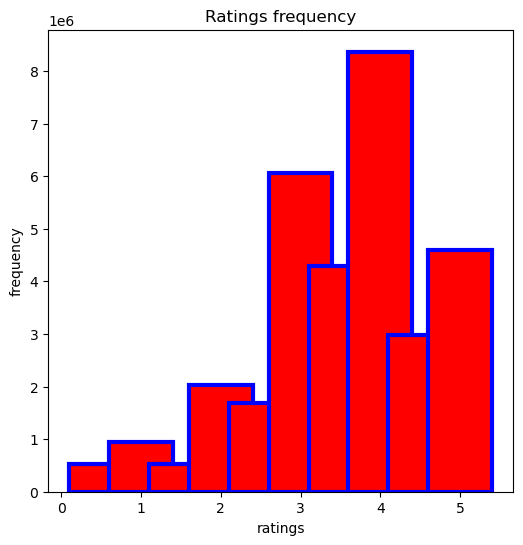

In [16]:
#caliing the function.
plot_ratings(diction)

# **Practical 2** (biases only)

In [5]:
#Function for the update of the biases.
def updtating_biases(user_biases, movies_biases, lamda, gamma, data_by_user, data_by_movie):
  #updating the user biases.
  for m in range (len(data_by_user)):
    bias = 0
    item_counter = 0
    for (n,r) in data_by_user[m]:
      bias+=lamda * (r-movies_biases[n])
      item_counter+=1
    bias=bias/(lamda*item_counter + gamma)
    user_biases[m]=bias

  #updating the movie biases
  for n in range (len(data_by_movie)):
    bias = 0
    item_counter = 0
    for (m,r) in data_by_movie[n]:
      bias+=lamda * (r-user_biases[m])
      item_counter += 1
    bias = bias/(lamda*item_counter + gamma)
    movies_biases[n] = bias
  return user_biases, movies_biases

In [17]:
#Training for the biases only.
M = len(data_by_user)
N = len(data_by_movie)

#initialization of the user biases and movies biases.
user_biases = np.zeros(M)
movies_biases = np.zeros(N)

epoch = 50 #choice of 50 epochs.
#choice of the hyper-parameters.
lamda = 0.02
gamma = 0.001

#Lists for the losses and the RMSE.
Loss_train_list = []
Loss_test_list = []
mse_train_list = []
mse_test_list = []

#updating for each epochs
for i in range (epoch):
  Loss_train = 0
  Loss_test = 0
  rmse_train = 0
  rmse_test = 0
  count = 0
  
  #update of the biases
  user_biases, movies_biases  = updtating_biases(user_biases, movies_biases, lamda, gamma, data_by_user, data_by_movie)
  
  #calculating the train losses and rmse
  for m in range (len(data_by_user_train)):
    for (n,r) in data_by_user_train[m]:
      Loss_train+=(-lamda/2) * ((r-user_biases[m]-movies_biases[n])**2)-(gamma/2)*((user_biases[m])**2+(movies_biases[n])**2)
      rmse_train+=(r-user_biases[m]-movies_biases[n])**2
      count+=1
  rmse_train=np.sqrt(rmse_train/count)
  mse_train_list.append(rmse_train)
  Loss_train_list.append(Loss_train)
  liste=[]

  #calculating the test losses and rmse
  for m in range (len(data_by_user_test)):
    for (n,r) in data_by_user_test[m]:
      rmse_test=(r-user_biases[m]-movies_biases[n])**2
      Loss_test+=(-lamda/2)*((r-user_biases[m]-movies_biases[n])**2)-(gamma/2) * ((user_biases[m])**2+(movies_biases[n])**2)
      liste.append(rmse_test)
  rmse_test=np.sqrt(np.mean(liste))
  mse_test_list.append(rmse_test)
  Loss_test_list.append(Loss_test)
  
  if i<10 or (i>10 and i%10==0):
    print(f'epoch{i+1}, Loss_test: {Loss_test}, Loss_train: {Loss_train}, Rmse train:{rmse_train}, Rmse test:{rmse_test}')

   




epoch1, Loss_test: -66.43345267139654, Loss_train: -1225.4161593098097, Rmse train:0.8038625090384389, Rmse test:0.8107321640699583
epoch2, Loss_test: -64.69936867272051, Loss_train: -1199.4273718603824, Rmse train:0.7869330375001764, Rmse test:0.7906148557267904
epoch3, Loss_test: -64.52377448647098, Loss_train: -1197.472748305907, Rmse train:0.7857156748158689, Rmse test:0.7887443758026613
epoch4, Loss_test: -64.47510208337103, Loss_train: -1196.8407921282753, Rmse train:0.7855895542857061, Rmse test:0.7884886956007073
epoch5, Loss_test: -64.44129275455921, Loss_train: -1196.2534435067462, Rmse train:0.7855683347504162, Rmse test:0.7884498482861526
epoch6, Loss_test: -64.40934616477854, Loss_train: -1195.6549828053357, Rmse train:0.785562643303535, Rmse test:0.7884468359750977
epoch7, Loss_test: -64.3774792251268, Loss_train: -1195.0527434418805, Rmse train:0.785560617382092, Rmse test:0.7884489788852822
epoch8, Loss_test: -64.34555248938072, Loss_train: -1194.4512286526485, Rmse tra

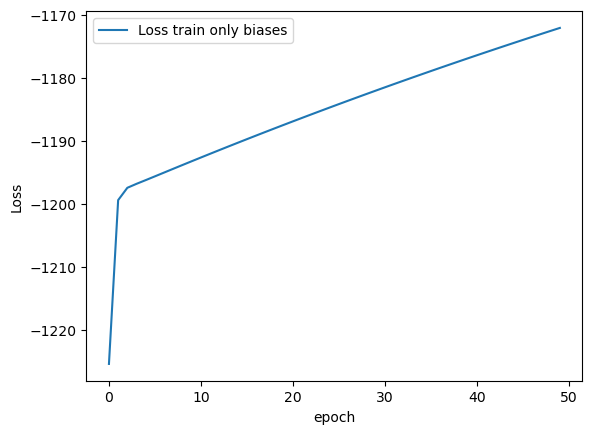

In [21]:
#Plotting the losses for the train
import matplotlib.pyplot as plt
plt.plot(Loss_train_list, label='Loss train only biases')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.savefig('biases_only_train.pdf', format = 'pdf', bbox_inches = 'tight')
plt.legend()
plt.show()

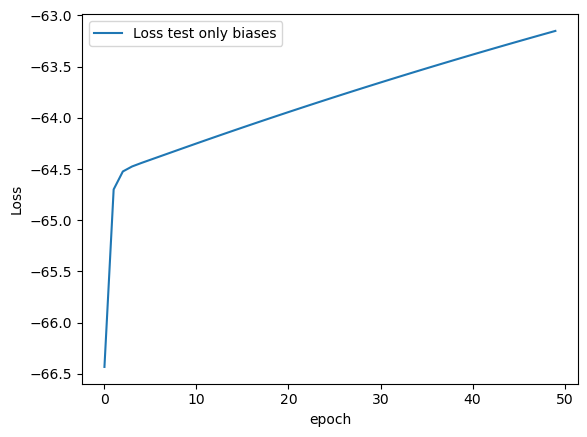

In [22]:
#Plotting the losses for the test.
import matplotlib.pyplot as plt
plt.plot(Loss_test_list, label='Loss test only biases')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.savefig('biases_only_test.pdf', format = 'pdf', bbox_inches = 'tight')
plt.legend()
plt.show()

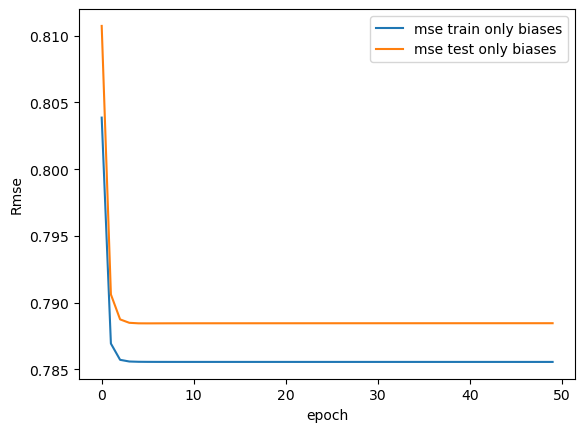

In [23]:
#Plotting the RMSE for the train and the test.
plt.plot(mse_train_list, label='mse train only biases')
plt.plot(mse_test_list, label = 'mse test only biases' )
plt.xlabel('epoch')
plt.ylabel('Rmse')
plt.savefig('biases_only_rmse.pdf', format = 'pdf', bbox_inches = 'tight')
plt.legend()
plt.show()

# **Practical 3**

In [24]:
#updating the user biases and the vector embedding of users
def updating_user(user_biases, movies_biases, user_vector, movie_vector, lamda, gamma, tau, data_by_user, data_by_movie):
  #updating the biases.
  for m in range (len(data_by_user)):
    bias = 0
    item_counter = 0
    for (n,r) in data_by_user[m]:
      bias+=lamda * (r-user_biases[m]-np.dot(user_vector[m,:], movie_vector[n,:]))
      item_counter+=1
    bias=bias/(lamda*item_counter + gamma)
    user_biases[m]=bias
  
  #updating the user vectors. 
  for m in range(len(data_by_user)):
    mat_vec = np.zeros((len(user_vector[m,:]),len(user_vector[m,:])))
    vec = np.zeros(len(user_vector[m,:]))
    for (n,r) in data_by_user[m]:
      mat_vec += np.outer(movie_vector[n,:],movie_vector[n,:])
      vec += lamda*(r - user_biases[m] - movies_biases[n])*movie_vector[n,:]
    mat_vec = lamda*(mat_vec) + tau*np.eye(len(movie_vector[n,:]))
    user_vector[m,:] = np.linalg.solve(mat_vec, vec)  
  
  return user_biases, user_vector

In [25]:
#updating the movie biases and the vector embedding of movies.
def updating_movie(user_biases, movies_biases, user_vector, movie_vector, lamda, gamma, tau, data_by_user, data_by_movie):
  #updating the biases.
  for n in range (len(data_by_user)):
    bias = 0
    item_counter = 0
    for (m,r) in data_by_movie[n]:
      bias+=lamda * (r-user_biases[m]-np.dot(user_vector[m,:], movie_vector[n,:]))
      item_counter += 1
    bias = bias/(lamda*item_counter + gamma)
    movies_biases[n] = bias

  #updating the vector embedding of movies.
  for n in range(len(data_by_movie)):
    mat_vec = np.zeros((len(movie_vector[n,:]),len(movie_vector[n,:])))
    vec = np.zeros(len(movie_vector[n,:]))
    for (m,r) in data_by_movie[n]:
      mat_vec += np.outer(user_vector[m,:],user_vector[m,:])
      vec += lamda*(r - user_biases[m] - movies_biases[n])*user_vector[m,:]
    mat_vec = lamda*(mat_vec) + tau*np.eye(len(user_vector[m,:]))
    movie_vector[n,:] = np.linalg.solve(mat_vec, vec)
  return movies_biases, movie_vector

In [26]:
#Calculating the losses
def loss_calculate(data, biases_u, biases_v, vector_u, vector_v, lamda, gamma,tau):
  loss = 0
  for m in range (len(data)):
    for (n,r) in data[m]:
      um = vector_u[m,:]
      vn = vector_v[n,:]
      bm = biases_u[m]
      bn = biases_v[n]
      loss+=(-lamda/2) * ((r - np.dot(um, vn) -bm- bn)**2)-(gamma/2)*((bm)**2+(bn)**2) - (tau/2)*(np.dot(um,um)+np.dot(vn,vn))
  return loss

In [27]:
#Calculating the RMSE
def rmse_calculate(data, biases_u, biases_v, vector_u, vector_v,lamda, gamma):
  rmse = 0
  count = 0
  for m in range (len(data)):
    for (n,r) in data[m]:
      rmse+=(r-biases_u[m]-biases_v[n]-np.dot(vector_u[m,:], vector_v[n,:]))**2
      count += 1
  rmse = rmse/count
  return np.sqrt(rmse)

In [28]:
#Training for an embedding dimension of 10 with the small dataset.
M = len(data_by_user)
N = len(data_by_movie)

#initialize the biases vectors.
user_biases = np.zeros(M)
movies_biases = np.zeros(N)
K=10
p=1/np.sqrt(K) #ecart type of the distributions.

#initialize the embedding vectors.
user_vector = np.random.normal(0,p, (M,K))
movie_vector = np.random.normal(0,p, (N,K))

epoch = 50#choice of epochs

#choice of the hyper-parameters.
lamda = 0.001
gamma = 0.2
tau = 0.001

#lists for the losses and the RMSE.
Loss_train_list = []
Loss_test_list = []
mse_train_list = []
mse_test_list = []


#updating in each epochs.
for i in range (epoch):

  #updating the biases and embedding vectors
  user_biases, user_vector  = updating_user(user_biases, movies_biases, user_vector, movie_vector, lamda, gamma, tau, data_by_user, data_by_movie)
  movies_biases, movie_vector = updating_movie(user_biases, movies_biases, user_vector, movie_vector, lamda, gamma, tau, data_by_user, data_by_movie)
  
  #Calculating the loss and rmse for the train.
  Loss_train = loss_calculate(data_by_user_train, user_biases, movies_biases, user_vector, movie_vector, lamda, gamma,tau)
  rmse = rmse_calculate(data_by_user_train, user_biases, movies_biases, user_vector, movie_vector,lamda, gamma)

  mse_train_list.append(rmse)
  Loss_train_list.append(Loss_train)
  
  #calculating the loss and rmse for the test.
  Loss_test = loss_calculate(data_by_user_test, user_biases, movies_biases, user_vector, movie_vector, lamda, gamma,tau)
  rmse_test = rmse_calculate(data_by_user_test, user_biases, movies_biases, user_vector, movie_vector, lamda, gamma)
  Loss_test_list.append(Loss_test)
  mse_test_list.append(rmse_test)

  if i<10 or (i>10 and i%10==0):
    print(f'epoch{i+1},  Loss_train: {Loss_train}, Loss_test: {Loss_test}, rmse_train : {rmse}, rmse test: {rmse_test}')





epoch1,  Loss_train: -48493.71221421648, Loss_test: -2601.3055701793182, rmse_train : 1.0024480801200075, rmse test: 0.9965867407772534
epoch2,  Loss_train: -2084.7922297562986, Loss_test: -113.9143616242319, rmse_train : 0.6732093681824681, rmse test: 0.6754747306903803
epoch3,  Loss_train: -856.9078968042808, Loss_test: -46.76017998399265, rmse_train : 0.5949903138270529, rmse test: 0.5954089288691591
epoch4,  Loss_train: -663.5216083680158, Loss_test: -35.872628925102276, rmse_train : 0.5644103750365924, rmse test: 0.5658516295355484
epoch5,  Loss_train: -630.5675857936192, Loss_test: -33.90394677740005, rmse_train : 0.548323792053798, rmse test: 0.5516415571633749
epoch6,  Loss_train: -637.5330069474875, Loss_test: -34.19781406291292, rmse_train : 0.5387143125271439, rmse test: 0.5441988404184502
epoch7,  Loss_train: -655.4783514852991, Loss_test: -35.12675195170974, rmse_train : 0.5325083249866246, rmse test: 0.5397712259269215
epoch8,  Loss_train: -676.0222183748051, Loss_test: -

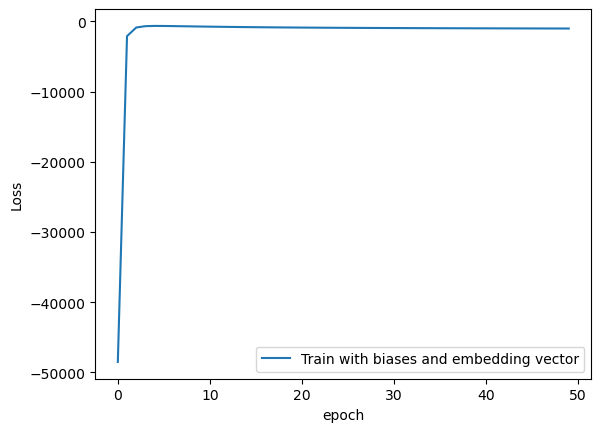

In [29]:
#ploting the losses for the train.
import matplotlib.pyplot as plt
plt.plot(Loss_train_list, label='Train with biases and embedding vector')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.savefig('embed3_train.pdf', format = 'pdf', bbox_inches = 'tight')
plt.legend()
plt.show()

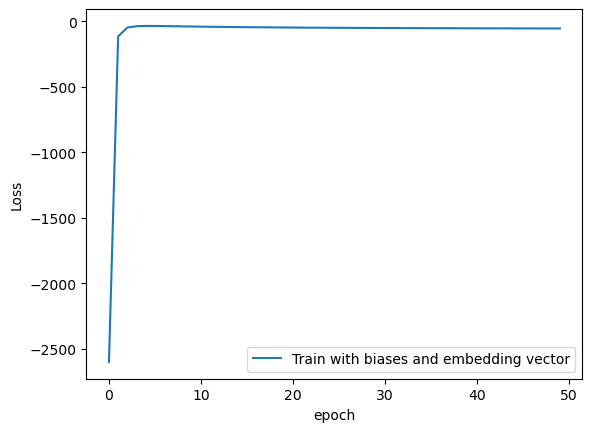

In [30]:
#Plotting the losses for the test.
import matplotlib.pyplot as plt
plt.plot(Loss_test_list, label='Train with biases and embedding vector')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.savefig('embed3_test.pdf', format = 'pdf', bbox_inches = 'tight')
plt.legend()
plt.show()

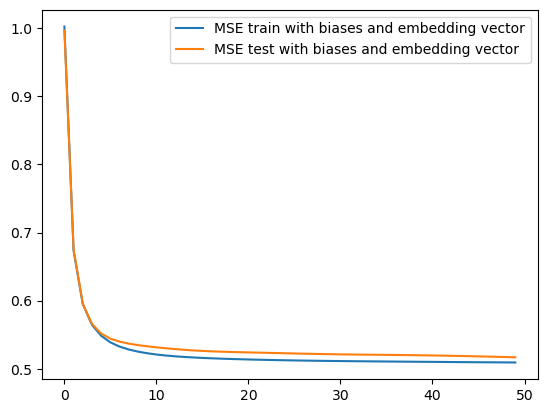

In [31]:
#Plotting the RMSE for the train and the test.
import matplotlib.pyplot as plt
plt.plot(mse_train_list, label = 'MSE train with biases and embedding vector')
plt.plot(mse_test_list, label = 'MSE test with biases and embedding vector')
plt.savefig('embed3_rmse.pdf', format = 'pdf', bbox_inches = 'tight')
plt.legend()
plt.show()